In [1]:
%pylab inline
import numpy as np
import os
import output as out
from main import *
from IPython.display import Image
from ipywidgets import FloatProgress
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


## BHL accretion 
Model generally works by:
1. Initializing a population of $M_0$.

3. Run through time, at each timestep:
    a. Pull from distribution of acceptable $\alpha$
    
    b. Prescribe an accretion rate of $dM/dt = \alpha M^2$
    
    c. New mass is $M_{i+1} = M_i + dM$
    
### Output
The code automatically makes 100 png (uniformly spaced in time) frames of the mass function and plots of M vs M^2.

There is an option (using ImageMagick) to convert these to a gif to view inline. You must have ImageMagick installed for this to work. Otherwise you can convert the pngs to a gif with whatever method you prefer.

Vector graphics can also be made by invoking $\verb|eps=True|$ as a kwarg in the $\verb|main|$ function, although fewer (10) frames will be made.

The main function will only return the very last steps values for t, dm/dt, and m

### $M_0$ distribution

The current function $\verb|get_m0|$ works by sampling from a log-normal distribution, so you specify the mean and spread with logged parameters. 
You can play around with parameters below:

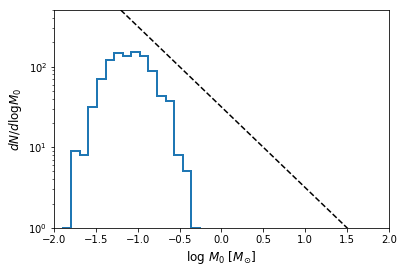

In [2]:
#Example m0 distribution
m0_mu = -1.1 #log normal mean of m0 distribution
m0_sig = 0.25 #log normal stdev of m0 dist
N0 = 1000 # Initial Number of stars
m0 = get_m0(m0_mu,m0_sig,N0, p=True) #returns array of  M not log(M)!

### $\alpha$ distribution

Current alpha distribution is set to be log-normal, parameters specified in log-space.

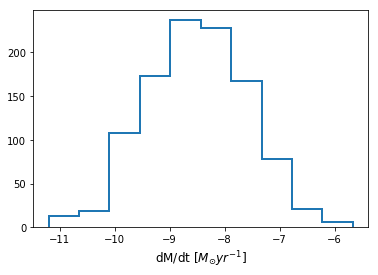

In [3]:
#log normal
alpha_mu_0 = -6.
alpha_sig_0 = 0.75
alpha0 = get_alpha(alpha_mu_0,alpha_sig_0,N0,log=True,p=False)

# Example accretion rates based on those values
dm_example = np.log10(alpha0*m0**2)
res = hist(dm_example,histtype='step',lw=2)
xlabel('dM/dt [$M_{\odot} yr^{-1}$]',fontsize=12)

# Test Case Examples
The following cells are individual cases in which different behavior for $\alpha$ is introduced. You can run them as is, but I recommend using them as templates and changing the parameters to get a feel for things.

$\verb|main|$ function default kwargs:

$\verb|dt = 5|$ (years) *current timestep

$\verb|alpha = 6.0e-6|$ 

$\verb|eps = False|$ *If True, the code will generate eps files for every 10 regular outputs

$\verb|progress = True|$ *If False, the code will no longer show a progress bar for the simualation, this is good if Ipython widgets don't work well for you

**Note: The current output rate is $\verb|out_dt = tend\100|$ such that every simulation produces 100 frames

## Simplest case $\alpha = const$ for all stars
Test run where alpha is a constant for all stars

-----------------------------
time = 0
N=1050
-----------------------------
Median M [Msol]: 0.0561173688725
Min/Max M [Msol]: 0.00603880024094 to 0.304087992456
-----------------------------
Median  dm/dt: 0.0
Min/Max dm/dt: 0 to 0
-----------------------------
Median alpha: 0.0
Min/max alpha: 0 to 0
-----------------------------
time = 1500000
N=1050
-----------------------------
Median M [Msol]: 0.0750761876826
Min/Max M [Msol]: 0.00620748617037 to 11.2570015513
-----------------------------
Median  dm/dt: 1.69092305558e-09
Min/Max dm/dt: 1.15598610611e-11 to 1.05263770383e-05
-----------------------------
Median alpha: 3e-06
Min/max alpha: 3e-06 to 3e-06


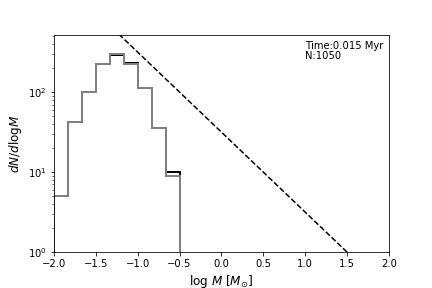

In [6]:

#initialize m0
m0_mu = -1.25 #log normal mean of m0 distribution
m0_sig = 0.25 #log normal stdev of m0 dist
N0 = 1050 # Initial Number of stars

m0 = get_m0(m0_mu,m0_sig,N0, p=False) 

tend = 1.5e6

#clear out old figures starting with "f_"
out.clear_png()


#run the sim
final_params = main(m0,tend,dt=10, alpha=3.0e-6)

#make a movie
os.system('convert -loop 1 -delay 40 f_mf_*.png f_mf.gif') #Needs ImageMagick
out.movie('f_mf.gif')



## Distribution of $\alpha$ centered around one point

-----------------------------
time = 0
N=1050
-----------------------------
Median M [Msol]: 0.0786756982574
Min/Max M [Msol]: 0.0125379087333 to 0.605282831551
-----------------------------
Median  dm/dt: 0.0
Min/Max dm/dt: 0 to 0
-----------------------------
Median alpha: 0.0
Min/max alpha: 0 to 0
-----------------------------
time = 2000000
N=1050
-----------------------------
Median M [Msol]: 0.127597243849
Min/Max M [Msol]: 0.013354841185 to 1.16099193818
-----------------------------
Median  dm/dt: 1.2396213551e-09
Min/Max dm/dt: 1.93855352681e-12 to 1.43933972291e-06
-----------------------------
Median alpha: 8.03862044416e-07
Min/max alpha: 2.47190072056e-09 to 7.16510232302e-05


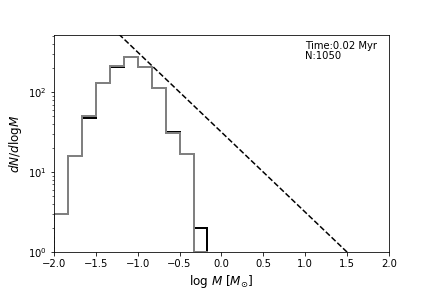

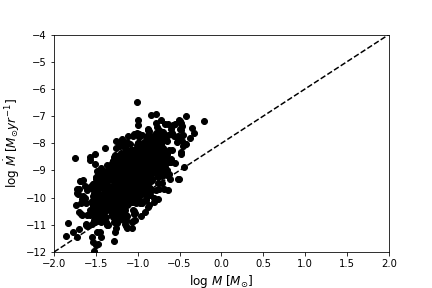

In [5]:
#initialize m0
m0_mu = -1.1 #log normal mean of m0 distribution
m0_sig = 0.25 #log normal stdev of m0 dist
N0 = 1050 # Initial Number of stars

m0 = get_m0(m0_mu,m0_sig,N0, p=False) 

tend = 2.0e6

#clear out old figures
out.clear_png()

alpha_mu = -6.1
alpha_sig = 0.65

#run the sim
final_params = main(m0,tend,dt=10, alpha=(alpha_mu,alpha_sig))

#make a movie
os.system('convert -loop 2 -delay 40 f_mf_*.png f_mf.gif')

os.system('convert -loop 0 -delay 40 f_acc_*.png f_acc.gif')

out.movie('f_acc.gif')
out.movie('f_mf.gif')

## Decreasing $\alpha$ with time 

-----------------------------
time = 0
N=1050
-----------------------------
Median M [Msol]: 0.0812706577117
Min/Max M [Msol]: 0.00887228461542 to 0.585995304303
-----------------------------
Median  dm/dt: 0.0
Min/Max dm/dt: 0 to 0
-----------------------------
Median alpha: 1050.0
Min/max alpha: 1050 to 1050
-----------------------------
time = 3000000
N=1050
-----------------------------
Median M [Msol]: 0.158106442274
Min/Max M [Msol]: 0.00936889049923 to 27.7829831961
-----------------------------
Median  dm/dt: 2.38598619473e-10
Min/Max dm/dt: 1.60236491353e-13 to 3.05180217713e-06
-----------------------------
Median alpha: 8.2778663713e-08
Min/max alpha: 3.34910007721e-10 to 2.94788219933e-05


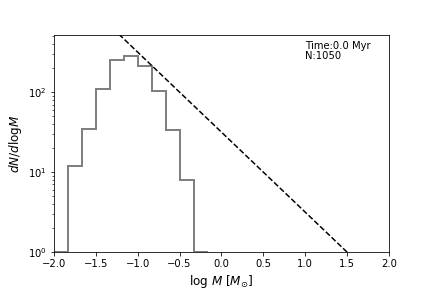

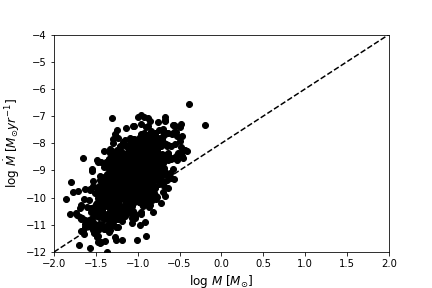

In [10]:
#initialize m0
m0_mu = -1.1 #log normal mean of m0 distribution
m0_sig = 0.25 #log normal stdev of m0 dist
N0 = 1050 # Initial Number of stars
m0 = get_m0(m0_mu,m0_sig,N0, p=False) #returns the masses not the logs!
tend = 3.0e6

alpha_mu = -6.1
alpha_sig = 0.75
alpha_slope_val = 1
alpha_power_val = 2
#clear out old figures
out.clear_png()

#run the sim
final_params = main(m0,tend,10, [alpha_mu,alpha_sig,alpha_slope_val,alpha_power_val])

#make a movie

os.system('convert -loop 0 -delay 40 f_mf_*.png f_mf.gif')
os.system('convert -loop 0 -delay 40 f_acc_*.png f_acc.gif')

out.movie('f_acc.gif')
out.movie('f_mf.gif')

## Spread in formation of $M_0$ 

-----------------------------
time = 0
N=75
-----------------------------
Median M [Msol]: 0.107700396677
Min/Max M [Msol]: 0.0195584268746 to 0.278179154535
-----------------------------
Median  dm/dt: 0.0
Min/Max dm/dt: 0 to 0
-----------------------------
Median alpha: 75.0
Min/max alpha: 75 to 75
-----------------------------
time = 1500000
N=1575
-----------------------------
Median M [Msol]: 0.12834986997
Min/Max M [Msol]: 0.0205922339599 to 5.79704403138
-----------------------------
Median  dm/dt: 1.52931429278e-09
Min/Max dm/dt: 1e-20 to 2.08782417867e-06
-----------------------------
Median alpha: 1.01093961213e-06
Min/max alpha: 3.81707455316e-08 to 3.43630448683e-05


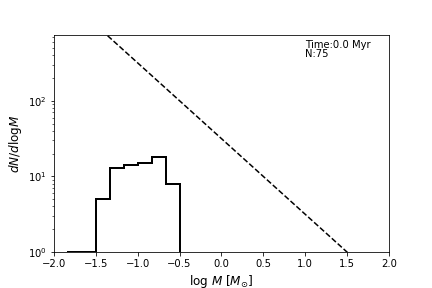

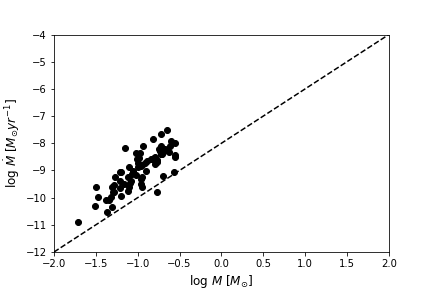

In [4]:

tend = 1.5e6
#clear out old figures
out.clear_png()

m0_mu = -0.95
m0_sig =0.25
sfr = 75

alpha_mu = -6.
alpha_sig = 0.45
#run the sim
final_params = main([m0_mu,m0_sig,sfr,tend/20.],tend,10, (alpha_mu,alpha_sig))

#make a movie

os.system('convert -loop 1 -delay 40 f_mf_*.png f_mf.gif')
os.system('convert -loop 0 -delay 40 f_acc_*.png f_acc.gif')

out.movie('f_acc.gif')
out.movie('f_mf.gif')

## Spread in formation of $m_0$ + varying $\alpha$ with time

-----------------------------
time = 0
N=50
-----------------------------
Median M [Msol]: 0.0784300357344
Min/Max M [Msol]: 0.0315857564256 to 0.297048377356
-----------------------------
Median  dm/dt: 0.0
Min/Max dm/dt: 0 to 0
-----------------------------
Median alpha: 50.0
Min/max alpha: 50 to 50
-----------------------------
time = 2500000
N=1050
-----------------------------
Median M [Msol]: 0.0941760026221
Min/Max M [Msol]: 0.0106275587412 to 10.0860105193
-----------------------------
Median  dm/dt: 6.53394731367e-11
Min/Max dm/dt: 1e-20 to 3.20704822786e-06
-----------------------------
Median alpha: 8.15154667834e-08
Min/max alpha: 4.01532762032e-10 to 3.20279880063e-05


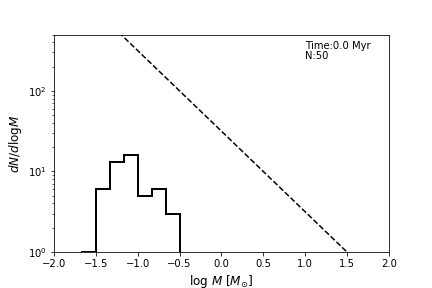

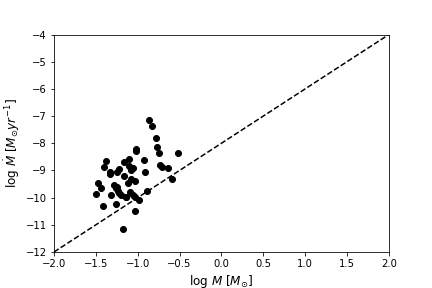

In [5]:
m0_mu = -1.1 #log normal mean of m0 distribution
m0_sig = 0.25 #log normal stdev of m0 dist
N0 = 1050 # Initial Number of stars
m0 = get_m0(m0_mu,m0_sig,N0, p=False) #full M0 distribution

alpha_mu = -6.1
alpha_sig = 0.75
alpha_slope_val = 1
alpha_power_val = 3

tend = 2.5e6
#clear out old figures
out.clear_png()

m0list = [m0_mu,m0_sig,50,tend/20.]
#run the sim
final_params = main(m0list,tend,dt =10, alpha=[alpha_mu,alpha_sig,alpha_slope_val, alpha_power_val])

#make a movie

os.system('convert -loop 0 -delay 40 f_mf_*.png f_mf.gif')
os.system('convert -loop 0 -delay 40 f_acc_*.png f_acc.gif')

out.movie('f_acc.gif')
out.movie('f_mf.gif')